# Load libraries

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

## set up sorting algos array

In [2]:
sort_algos = ["SelectionSort", "InsertionSort", "MergeSort", "CountingSort", "NativeSort", "HeapSort", "QuickSort"]

# Load data

In [3]:
data={}
for x in sort_algos:
        data[x]=pd.read_csv("./data/warmed_up/" + x + ".csv")

### Run this cell to visualize all the raw data

In [4]:
for algo, df in data.items():
    print(algo)
    print(df.head(2),"\n")

SelectionSort
   power     start_time      stop_time
0      1  1569967914680  1569967914681
1      2  1569967914681  1569967914681 

InsertionSort
   power     start_time      stop_time
0      1  1569967499978  1569967499978
1      2  1569967499979  1569967499979 

MergeSort
   power     start_time      stop_time
0      1  1569967458349  1569967458349
1      2  1569967458350  1569967458350 

CountingSort
   power     start_time      stop_time
0      1  1569967466017  1569967466023
1      2  1569967466023  1569967466028 

NativeSort
   power     start_time      stop_time
0      1  1569967470194  1569967470196
1      2  1569967470196  1569967470197 

HeapSort
   power     start_time      stop_time
0      1  1569967487922  1569967487924
1      2  1569967487924  1569967487925 

QuickSort
   power     start_time      stop_time
0      1  1569967448572  1569967448573
1      2  1569967448576  1569967448577 



### Run the next 2 cells to see first dataframe and quick metrics about it

In [5]:
data[sort_algos[3]].head(2)

,power,start_time,stop_time
0,1,1569967466017,1569967466023
1,2,1569967466023,1569967466028


In [6]:
data[sort_algos[3]].describe()

,power,start_time,stop_time
count,16.000000,1.600000e+01,1.600000e+01
mean,8.500000,1.569967e+12,1.569967e+12
std,4.760952,7.735617e+02,1.116874e+03
min,1.000000,1.569967e+12,1.569967e+12
25%,4.750000,1.569967e+12,1.569967e+12
50%,8.500000,1.569967e+12,1.569967e+12
75%,12.250000,1.569967e+12,1.569967e+12
max,16.000000,1.569967e+12,1.569967e+12


# Creating the new features

- running time in miliseconds<br>
- log_run_time

In [7]:
'''
This function computes the log base 2 of the parameter passed to the function
If the parameter is equal to zero then we assume it's equal to 1 because it isn't that big of a difference in milliseconds
'''
def log_time(run_time):
    if run_time ==0:
        run_time=1
    return math.log(run_time,2)
    

In [8]:
# Array count is a the number of arrays used in the benchmark, we didn't export it as a csv
array_count = 1000

for algo, df in data.items():
    # Compute runtime
    df["run_time"] = (df.loc[:,"stop_time"] - df.loc[:,"start_time"])/array_count
    
    # log of runtime
    df["log_run_time"] = df.loc[:,'run_time'].apply(lambda x: log_time(x))

In [24]:
for algo, df in data.items():
    print(algo)
    print(df.loc[:,"run_time"].iloc[14])

228.461
76.131
1.532
0.672
4.079
2.623
1.888


## Selection sort Dataframe

In [9]:
data[sort_algos[0]]

,power,start_time,stop_time,run_time,log_run_time
0,1,1569967914680,1569967914681,0.001,-9.965784
1,2,1569967914681,1569967914681,0.000,0.000000
2,3,1569967914682,1569967914682,0.000,0.000000
3,4,1569967914683,1569967914684,0.001,-9.965784
4,5,1569967914686,1569967914691,0.005,-7.643856
5,6,1569967914692,1569967914697,0.005,-7.643856
6,7,1569967914699,1569967914709,0.010,-6.643856
7,8,1569967914712,1569967914737,0.025,-5.321928
8,9,1569967914743,1569967914823,0.080,-3.643856
9,10,1569967914835,1569967915122,0.287,-1.800877


# Plotting runtime for each sort

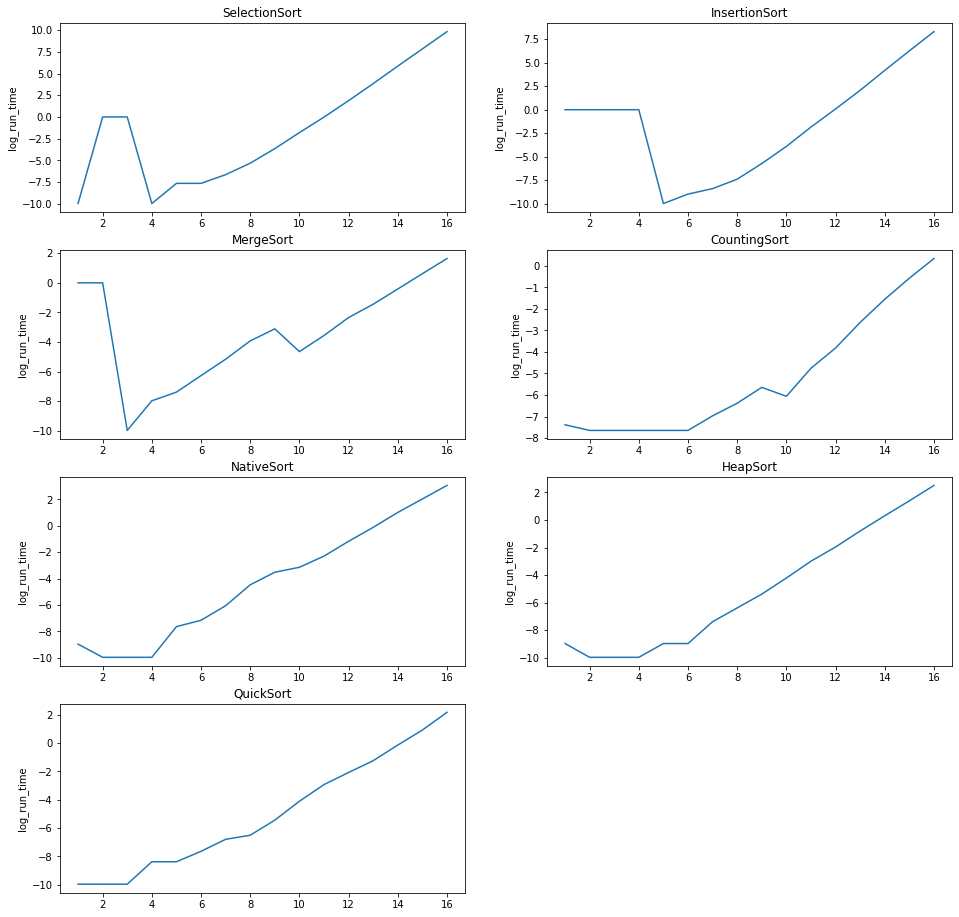

In [10]:
# INDIVIDUAL PLOT
fig = plt.figure(figsize=(16, 16))
fig.tight_layout()

nb_sorts = len(sort_algos)
columns = 2
rows = math.ceil(nb_sorts/2) # We round up, if we have 7 sorts, with 2 columns, we need 4 rows. so rounding up 6/2 gives 4
i=1
for algo, df in data.items():
    # Simply plotting without the log add param `logx = True` or `logy = True` for log on x or y axis to the plot function
    # Check pandas dataframe.plot() for more details
    plt.subplot(rows, columns, i)
    plt.title(algo)
    #plt.xlabel('power')
    plt.ylabel('log_run_time')
    
    plt.plot(df.loc[:,"power"], df.loc[:,"log_run_time"])
    i += 1 # Next subplot
plt.show()

## Grouped plot

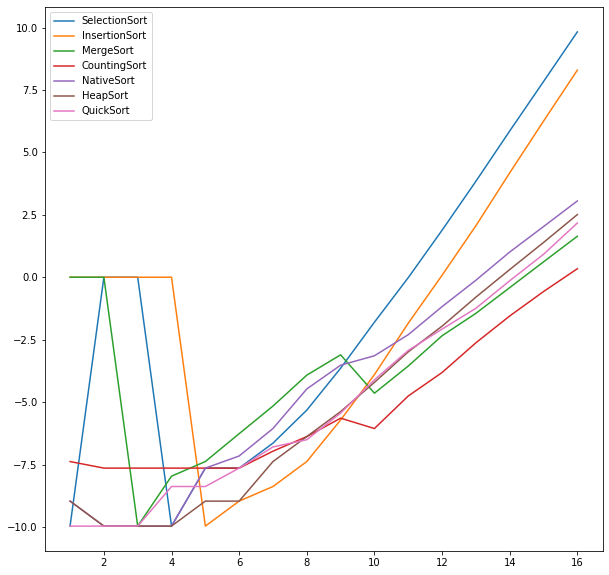

In [11]:
fig = plt.figure(figsize=(10, 10))

for algo, df in data.items():
    #df = df.iloc[6:]
    plt.plot(df.loc[:,"power"], df.loc[:,"log_run_time"], label=algo)
    

plt.legend()
plt.show()

# Computing the coeff

SelectionSort
a: 1.041772594311933, b: -10.318108557452424 

InsertionSort
a: 0.5752633869244697, b: -6.470509400905804 

MergeSort
a: 0.363948795248494, b: -6.463340567328274 

CountingSort
a: 0.5361640313936723, b: -9.784463445531768 

NativeSort
a: 0.9188228486650896, b: -12.083356547192496 

HeapSort
a: 0.8892524339680524, b: -12.664199419278745 

QuickSort
a: 0.8420982673663835, b: -12.186766448150554 



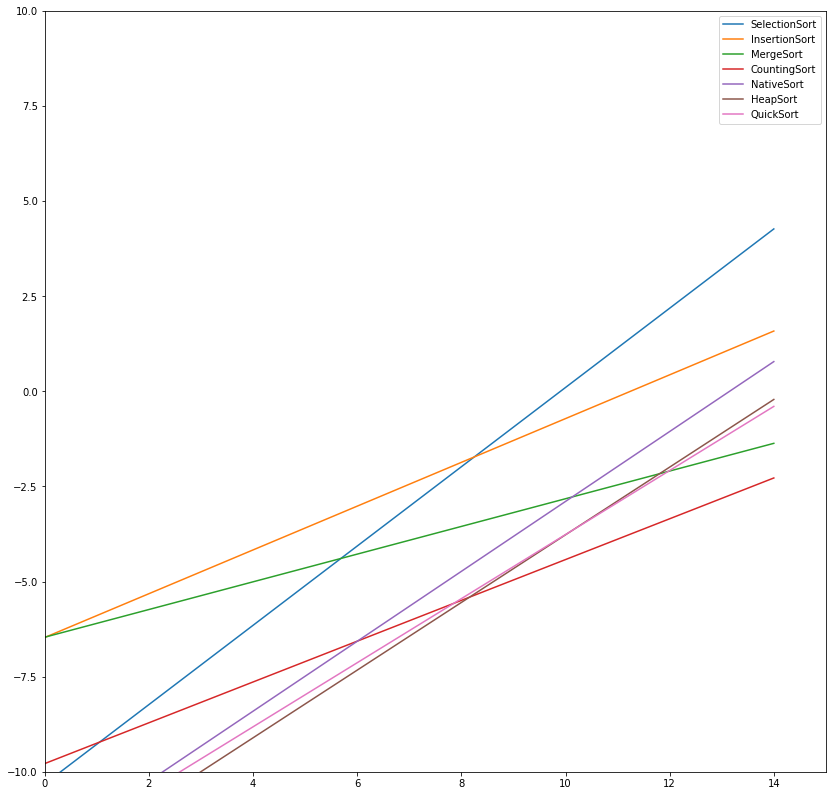

In [22]:
fig = plt.figure(figsize=(14, 14))
axes = plt.gca()
axes.set_xlim([0,15])
axes.set_ylim([-10,10])
for algo, df in data.items():
    print(algo)
    
    cov = df.loc[:,['log_run_time','power']].cov().iloc[0][1]

    a = cov/df["power"].var()
    b = df["log_run_time"].mean() - df["power"].mean()*a
    print("a: " + str(a) + ", b: " + str(b),'\n')
    
    x = np.arange(0,15)
    y = x*a + b
    plt.plot(x, y, label=algo)
    
plt.legend()
plt.show()

SelectionSort
a: 1.8584034296156438, b: -20.190577754974132 

InsertionSort
a: 1.9076015698990259, b: -22.57349417618288 

MergeSort
a: 0.710358107742844, b: -10.402986039409816 

CountingSort
a: 0.8369921867008874, b: -13.428710559675634 

NativeSort
a: 0.9720787827917375, b: -12.649743466665004 

HeapSort
a: 1.1097546782032974, b: -15.251594197421149 

QuickSort
a: 1.021873226648595, b: -14.367546726152629 



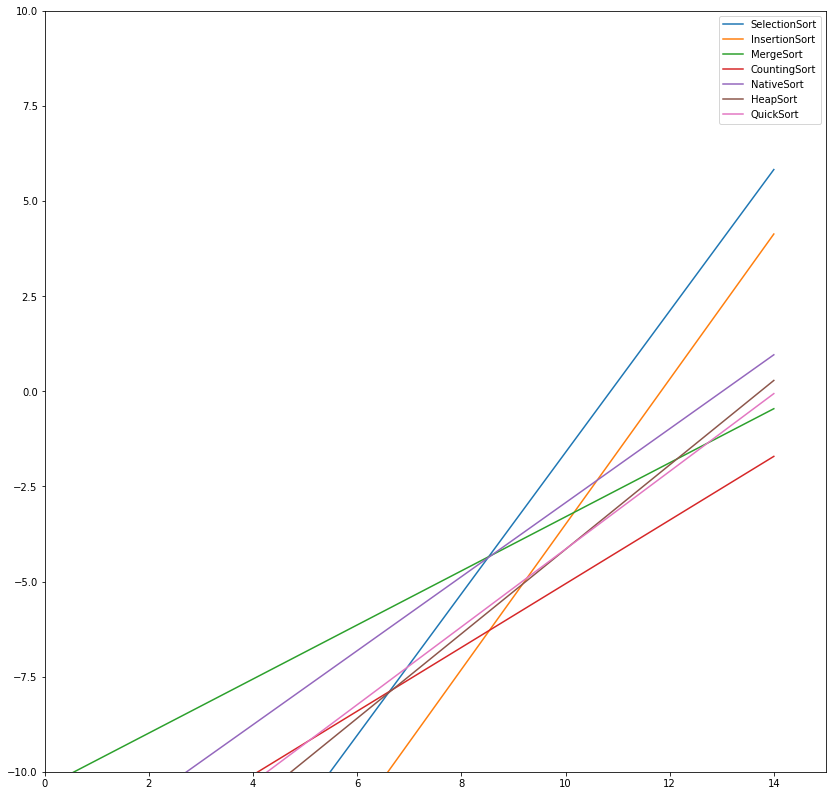

In [23]:
fig = plt.figure(figsize=(14, 14))
axes = plt.gca()
axes.set_xlim([0,15])
axes.set_ylim([-10,10])

for algo, df in data.items():
    df = df.iloc[6:]
    print(algo)
    
    cov = df.loc[:,['log_run_time','power']].cov().iloc[0][1]

    a = cov/df["power"].var()
    b = df["log_run_time"].mean() - df["power"].mean()*a
    print("a: " + str(a) + ", b: " + str(b),'\n')
    
    x = np.arange(0,15)
    y = x*a + b
    plt.plot(x, y, label=algo)
    
plt.legend()
plt.show()

# Ploting benchmark results and regression

## All data in the dataframes

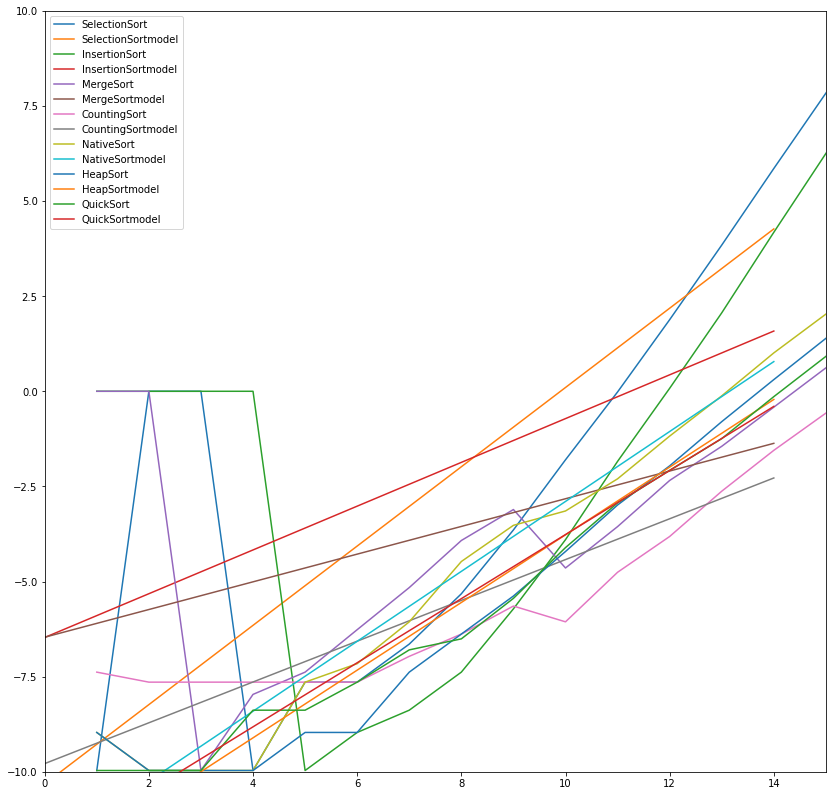

In [13]:
fig = plt.figure(figsize=(14, 14))
axes = plt.gca()
axes.set_xlim([0,15])
axes.set_ylim([-10,10])
for algo, df in data.items():
    #df = df.iloc[6:]
    #ploting the benchmar
    plt.plot(df.loc[:,"power"], df.loc[:,"log_run_time"], label=algo)
    
    # Computing the cov
    cov = df.loc[:,['log_run_time','power']].cov().iloc[0][1]
    # Computing the a and b
    a = cov/df["power"].var()
    b = df["log_run_time"].mean() - df["power"].mean()*a
    
    # Computing and ploting the modeled function
    x = np.arange(0,15)
    y = x*a + b
    plt.plot(x, y, label=algo+'model')

plt.legend()
plt.show()

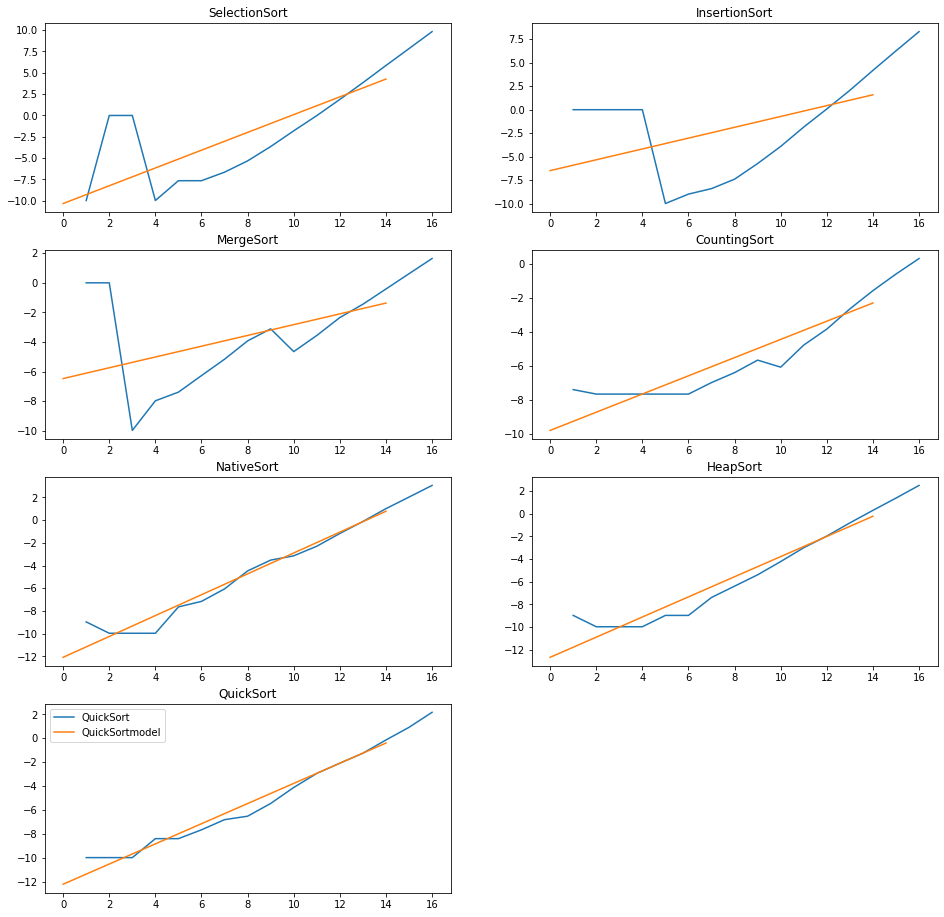

In [15]:
fig = plt.figure(figsize=(16, 16))
fig.tight_layout() # Tight labels to the charts

axes = plt.gca()
axes.set_xlim([0,15])
axes.set_ylim([-10,10])

#multiple subplot parameters
nb_sorts = len(sort_algos)
columns = 2
rows = math.ceil(nb_sorts/2) # We round up, if we have 7 sorts, with 2 columns, we need 4 rows. so rounding up 6/2 gives 4
i=1


for algo, df in data.items():
    #new subplot
    plt.subplot(rows, columns, i)
    plt.title(algo)
    
    #ploting the benchmar
    plt.plot(df.loc[:,"power"], df.loc[:,"log_run_time"], label=algo)
    
    # Computing the cov
    cov = df.loc[:,['log_run_time','power']].cov().iloc[0][1]
    # Computing the a and b
    a = cov/df["power"].var()
    b = df["log_run_time"].mean() - df["power"].mean()*a
    
    # Computing and ploting the modeled function
    x = np.arange(0,15)
    y = x*a + b
    plt.plot(x, y, label=algo+'model')
    
    # next subplot
    i += 1
plt.legend()
plt.show()

## Omitting the first 6 results

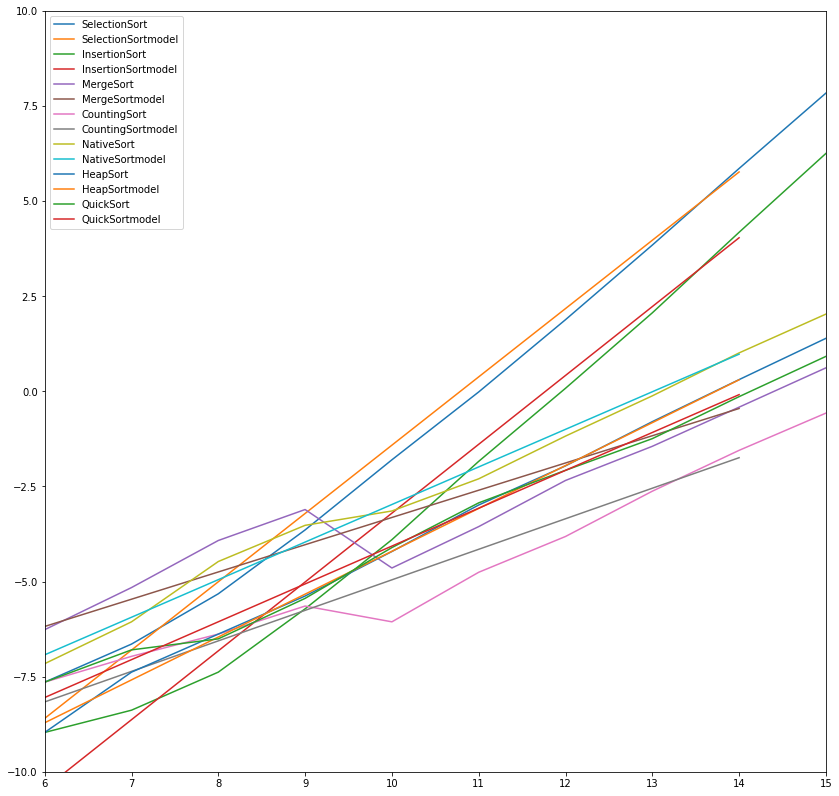

In [20]:
fig = plt.figure(figsize=(14, 14))
axes = plt.gca()
axes.set_xlim([6,15])
axes.set_ylim([-10,10])
for algo, df in data.items():
    df = df.iloc[5:]
    #ploting the benchmar
    plt.plot(df.loc[:,"power"], df.loc[:,"log_run_time"], label=algo)
    
    # Computing the cov
    cov = df.loc[:,['log_run_time','power']].cov().iloc[0][1]
    # Computing the a and b
    a = cov/df["power"].var()
    b = df["log_run_time"].mean() - df["power"].mean()*a
    
    # Computing and ploting the modeled function
    x = np.arange(0,15)
    y = x*a + b
    plt.plot(x, y, label=algo+'model')

plt.legend()
plt.show()

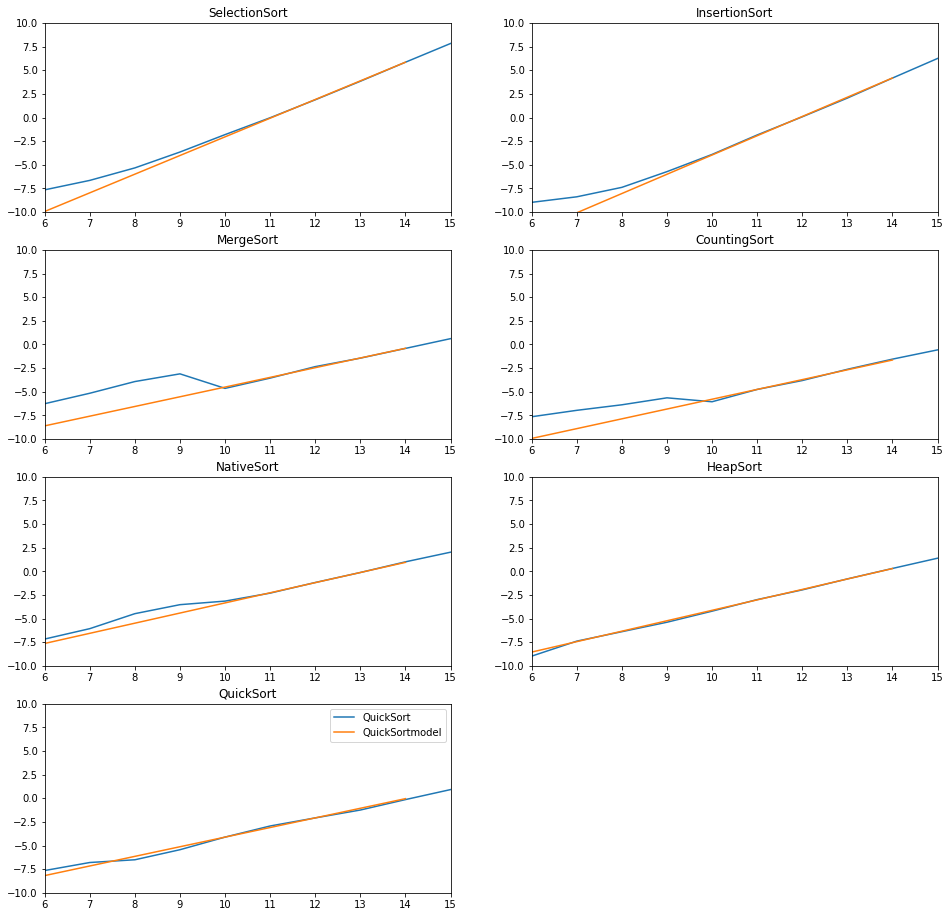

In [21]:
fig = plt.figure(figsize=(16, 16))
fig.tight_layout() # Tight labels to the charts

#multiple subplot parameters
nb_sorts = len(sort_algos)
columns = 2
rows = math.ceil(nb_sorts/2) # We round up, if we have 7 sorts, with 2 columns, we need 4 rows. so rounding up 6/2 gives 4
i=1


for algo, df in data.items():
    df = df.iloc[5:]
    
    #new subplot
    plt.subplot(rows, columns, i)
    plt.title(algo)
    axes = plt.gca()
    axes.set_xlim([6,15])
    axes.set_ylim([-10,10])
    
    #ploting the benchmar
    plt.plot(df.loc[:,"power"], df.loc[:,"log_run_time"], label=algo)
    
    # Omitting the first 5 results
    df = df.iloc[5:]
    # Computing the cov
    cov = df.loc[:,['log_run_time','power']].cov().iloc[0][1]
    # Computing the a and b
    a = cov/df["power"].var()
    b = df["log_run_time"].mean() - df["power"].mean()*a
    
    # Computing and ploting the modeled function
    x = np.arange(0,15)
    y = x*a + b
    plt.plot(x, y, label=algo+'model')
    
    # next subplot
    i += 1
plt.legend()
plt.show()